In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import RectBivariateSpline
from scipy.interpolate import interp2d
import datetime
from scipy.interpolate import griddata
from NF2FF import *
import pandas
import scipy.io as sio
from electric_field_errors import *

In [3]:
broadcast_freq=94*(10**9) # broadcast frequency in hertz
# NF_X_Complex_data=np.array(pandas.read_csv('NF_X_Complex.csv',header=None)).flatten()
# NF_X_Complex_data=np.array([complex(x.replace('i','j')) for x in NF_X_Complex_data]).reshape((51,51,201))
# NF_Y_Complex_data=np.array(pandas.read_csv('NF_Y_Complex.csv',header=None)).flatten()
# NF_Y_Complex_data=np.array([complex(x.replace('i','j')) for x in NF_Y_Complex_data]).reshape((51,51,201))
MATLAB_data = sio.loadmat('MATLAB_data')

MATLAB_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Ephi_array', 'Etheta_array', 'NF_X_Complex_array', 'NF_Y_Complex_array', 'f_X_Rectangular_array', 'f_X_Spherical_array', 'f_Y_Rectangular_array', 'f_Y_Spherical_array', 'f_Z_Rectangular_array', 'f_Z_Spherical_array', 'freq'])

In [4]:
NF_X_Complex_data=MATLAB_data['NF_X_Complex_array']
NF_Y_Complex_data=MATLAB_data['NF_Y_Complex_array']

NF_X_Complex_data.shape

(51, 51, 201)

In [5]:
# set up the gridding

M = NF_X_Complex_data.shape[0]
N = NF_X_Complex_data.shape[1]
dx=1/1000#sdata.x_step/1000; # Sample spacing in the x direction [m]
dy=1/1000#sdata.y_step/1000; # Sample spacing in the y direction [m]
# See equations (16-10a) and (16-10b) in Balanis
a=dx*(M-1); # The length of the scanned area in the x direction [m]
b=dy*(N-1); # The length of the scanned area in the y direction [m]
x=np.linspace(-a/2,a/2,M)
y=np.linspace(-b/2,b/2,N)
z0=0.006;

[m,n,k_X_Rectangular,k_Y_Rectangular,theta,phi] = RegularGridding(x,y,0.05,0.05)

In [6]:
freq = (MATLAB_data['freq']).flatten()
find=200
f=freq[find];print(f*1e-9)
k0 = Calculate_k0(f)

110.0


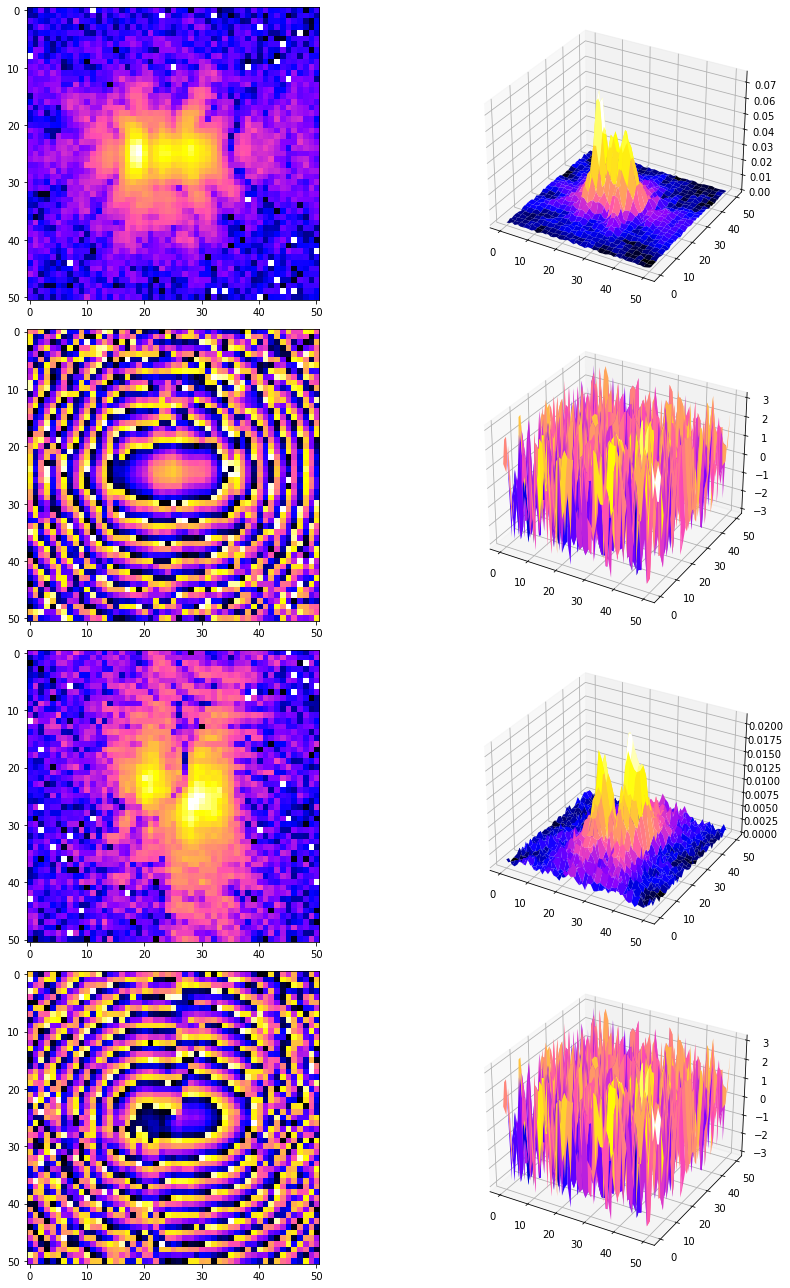

In [7]:
# plotting NF patterns

fig=figure(figsize=(16,18))
ax=fig.add_subplot(4, 2, 1)
ax.imshow(np.abs(NF_X_Complex_data[:,:,find]),aspect='equal',cmap='gnuplot2',norm=LogNorm())
ax=fig.add_subplot(4, 2, 2, projection='3d')
[X,Y]=np.meshgrid(np.arange(51),np.arange(51))
ax.plot_surface(X,Y,np.abs(NF_X_Complex_data[:,:,find]),cmap='gnuplot2',norm=LogNorm())
ax=fig.add_subplot(4, 2, 5)
ax.imshow(np.abs(NF_Y_Complex_data[:,:,find]),aspect='equal',cmap='gnuplot2',norm=LogNorm())
ax=fig.add_subplot(4, 2, 6, projection='3d')
ax.plot_surface(X,Y,np.abs(NF_Y_Complex_data[:,:,find]),cmap='gnuplot2',norm=LogNorm())
tight_layout()

ax=fig.add_subplot(4, 2, 3)
ax.imshow(np.angle(NF_X_Complex_data[:,:,find]),aspect='equal',cmap='gnuplot2')
ax=fig.add_subplot(4, 2, 4, projection='3d')
[X,Y]=np.meshgrid(np.arange(51),np.arange(51))
ax.plot_surface(X,Y,np.angle(NF_X_Complex_data[:,:,find]),cmap='gnuplot2')
ax=fig.add_subplot(4, 2, 7)
ax.imshow(np.angle(NF_Y_Complex_data[:,:,find]),aspect='equal',cmap='gnuplot2')
ax=fig.add_subplot(4, 2, 8, projection='3d')
ax.plot_surface(X,Y,np.angle(NF_X_Complex_data[:,:,find]),cmap='gnuplot2')
tight_layout()

/Users/ana/Documents/Yale/Newburgh Lab Research/Python_NF2FF/NF2FF.py:92: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(kx_grid,ky_grid,fx_magnitude,cmap='gnuplot2',norm=LogNorm())
/Users/ana/Documents/Yale/Newburgh Lab Research/Python_NF2FF/NF2FF.py:93: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(kx_grid,ky_grid,fy_magnitude,cmap='gnuplot2',norm=LogNorm())
/Users/ana/Documents/Yale/Newburgh Lab Research/Python_NF2FF/NF2FF.py:

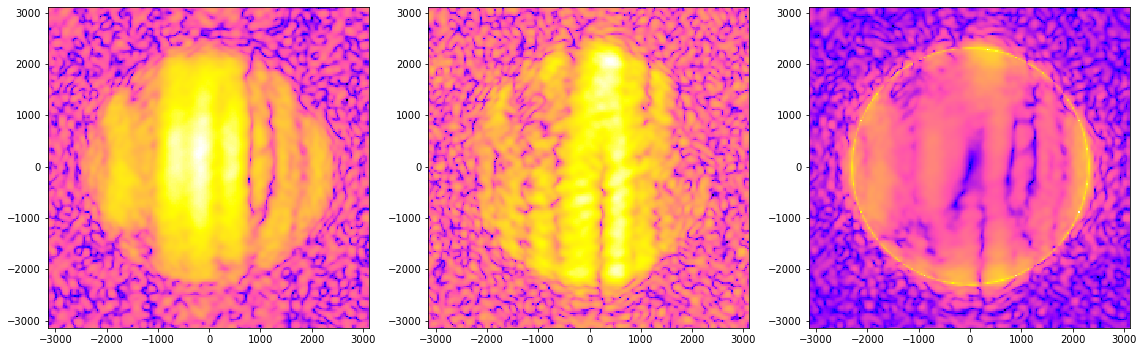

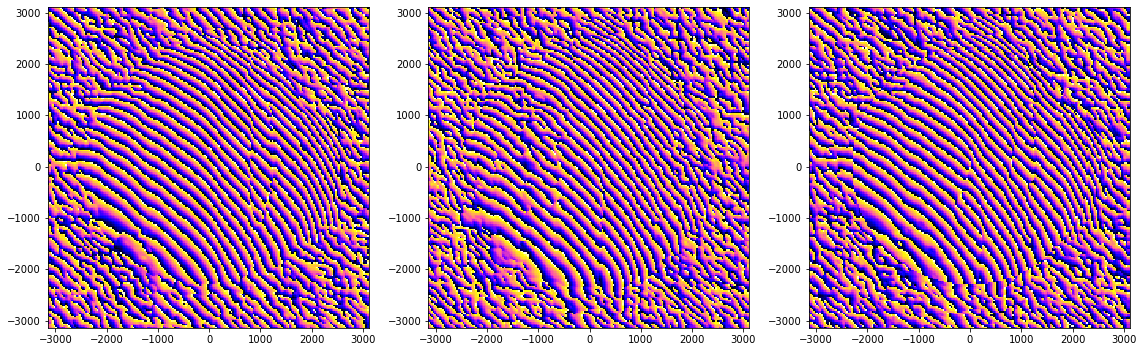

In [8]:
FourierSpace_transformed = NFtoFourier(NF_X_Complex_data[:,:,200],NF_Y_Complex_data[:,:,200],k_X_Rectangular,k_Y_Rectangular,k0, plotFourier=True)

fig,[ax1,ax2,ax3]=subplots(nrows=1,ncols=3,figsize=(16,5.5))
ax1.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.angle(FourierSpace_transformed[0]),cmap='gnuplot2')
ax2.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.angle(FourierSpace_transformed[1]),cmap='gnuplot2')
ax3.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.angle(FourierSpace_transformed[2]),cmap='gnuplot2')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
tight_layout()

In [9]:
f_X_MATLAB = (MATLAB_data['f_X_Rectangular_array'])[:,:,200]
f_Y_MATLAB = (MATLAB_data['f_Y_Rectangular_array'])[:,:,200]
f_Z_MATLAB = (MATLAB_data['f_Z_Rectangular_array'])[:,:,200]

f_X_MATLAB.shape

(204, 204)

<ipython-input-10-0afdbec22324>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.abs(f_X_MATLAB),cmap='gnuplot2',norm=LogNorm())
<ipython-input-10-0afdbec22324>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.abs(f_Y_MATLAB),cmap='gnuplot2',norm=LogNorm())
<ipython-input-10-0afdbec22324>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the sa

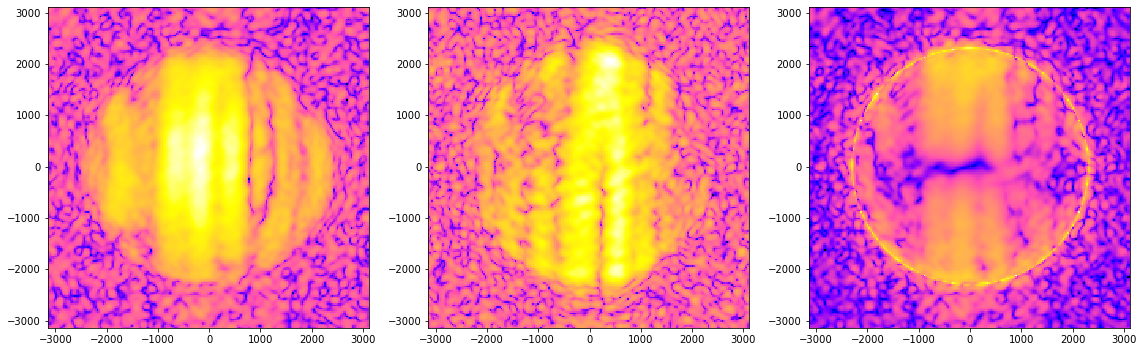

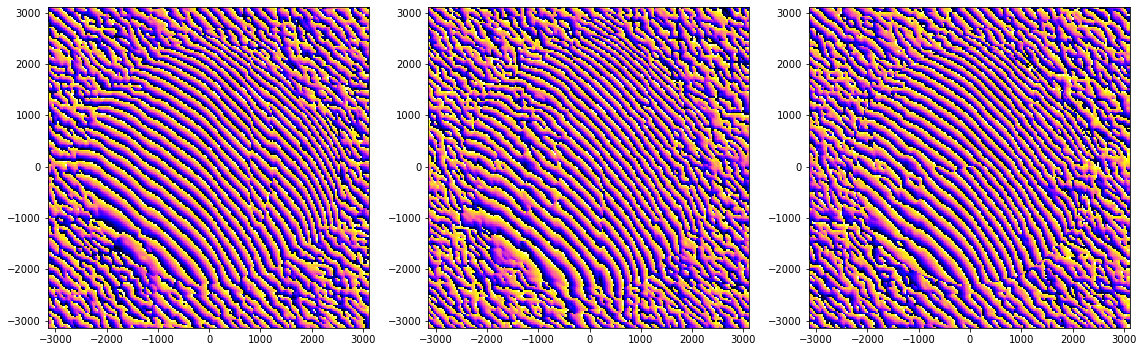

In [10]:
fig,[ax1,ax2,ax3]=subplots(nrows=1,ncols=3,figsize=(16,5.5))
ax1.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.abs(f_X_MATLAB),cmap='gnuplot2',norm=LogNorm())
ax2.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.abs(f_Y_MATLAB),cmap='gnuplot2',norm=LogNorm())
ax3.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.abs(f_Z_MATLAB),cmap='gnuplot2',norm=LogNorm())

ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
tight_layout()

fig,[ax1,ax2,ax3]=subplots(nrows=1,ncols=3,figsize=(16,5.5))
ax1.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.angle(f_X_MATLAB),cmap='gnuplot2')
ax2.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.angle(f_Y_MATLAB),cmap='gnuplot2')
ax3.pcolormesh(k_X_Rectangular,k_Y_Rectangular,np.angle(f_Z_MATLAB),cmap='gnuplot2')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
tight_layout()

Amplitude and phase of mean weighted percent difference (vector form): 3.2944033859766858e-15, 3.0334534799648982
Mean weighted percent difference in amplitude and phase: 2.025626567339229e-14, 0.140449603404656
Amplitude and phase of error range: 5.515478954935336e-20, 0.7419472680059175
Amplitude and phase of percent difference range: 1.2750283658568384e-10, 0.4930206254653876
Amplitude and phase of standard deviation of the error: 3.901940847678383e-21, 0.7889927406795204
Amplitude and phase of standard deviation of percent error: 5.889356922001772e-13, 0.44634284503601657
Mean of amplitude(b1) - amplitude(b2): -1.158680748478637e-22
Mean of pct difference amplitude metric: 8.66223115862861e-18
Solid angle error fraction (excluded): 0.0


{'error': array([[-1.05879118e-21-1.95876369e-21j, -6.35274710e-22+4.23516474e-22j,
          1.05879118e-21-1.27054942e-21j, ...,
         -1.05879118e-21+8.99972506e-22j,  0.00000000e+00-1.90582413e-21j,
         -2.11758237e-22-1.27054942e-21j],
        [ 5.29395592e-22-2.11758237e-21j, -1.42936810e-21+6.35274710e-22j,
          5.98878763e-22-1.05879118e-22j, ...,
         -8.47032947e-22-2.38228016e-22j,  1.74700545e-21-1.05879118e-21j,
          1.05879118e-21-8.99972506e-22j],
        [ 2.59403840e-21-9.92616735e-22j, -6.68361935e-22+5.02925812e-22j,
          4.23516474e-22+1.69406589e-21j, ...,
         -2.11758237e-22-2.11758237e-21j,  2.11758237e-21-3.17637355e-22j,
          2.27640105e-21-2.64697796e-22j],
        ...,
        [-4.23516474e-22+3.38813179e-21j,  6.88214270e-22+2.54109884e-21j,
         -2.85873620e-21+8.47032947e-22j, ...,
          1.48230766e-21-1.05879118e-21j, -4.23516474e-22+6.35274710e-22j,
          8.47032947e-22+1.58818678e-21j],
        [-1.045556

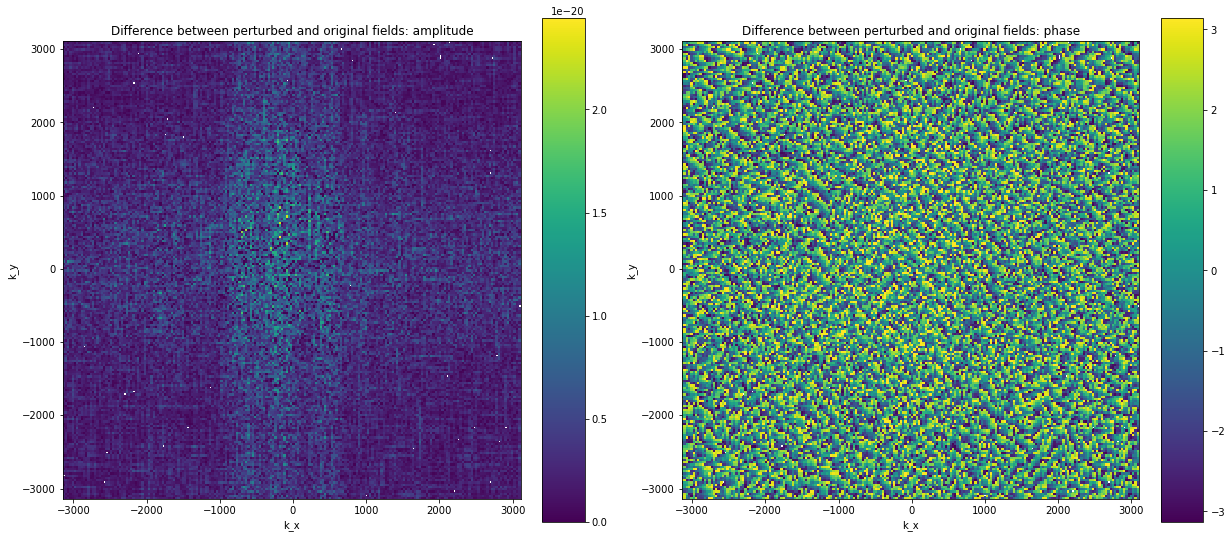

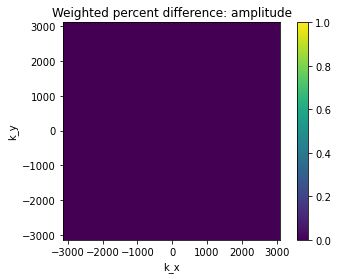

In [33]:
# run electric_field_errors on the two datasets
electric_field_errors(f_X_MATLAB,FourierSpace_transformed[0],k_X_Rectangular,k_Y_Rectangular,'k_x','k_y',outputs=1)

Amplitude and phase of mean weighted percent difference (vector form): inf, nan
Mean weighted percent difference in amplitude and phase: inf, 0.03800548255323644
Amplitude and phase of error range: 0.0008128086624380911, 0.7682154429325442
Amplitude and phase of percent difference range: inf, nan
Amplitude and phase of standard deviation of the error: 1.2496699939125484e-05, 0.7954257503468481
Amplitude and phase of standard deviation of percent error: nan, nan
Mean of amplitude(b1) - amplitude(b2): -1.0796202209473762e-06
Mean of pct difference amplitude metric: -0.10890340176275064
Solid angle error fraction (excluded): 0.24240955021396882


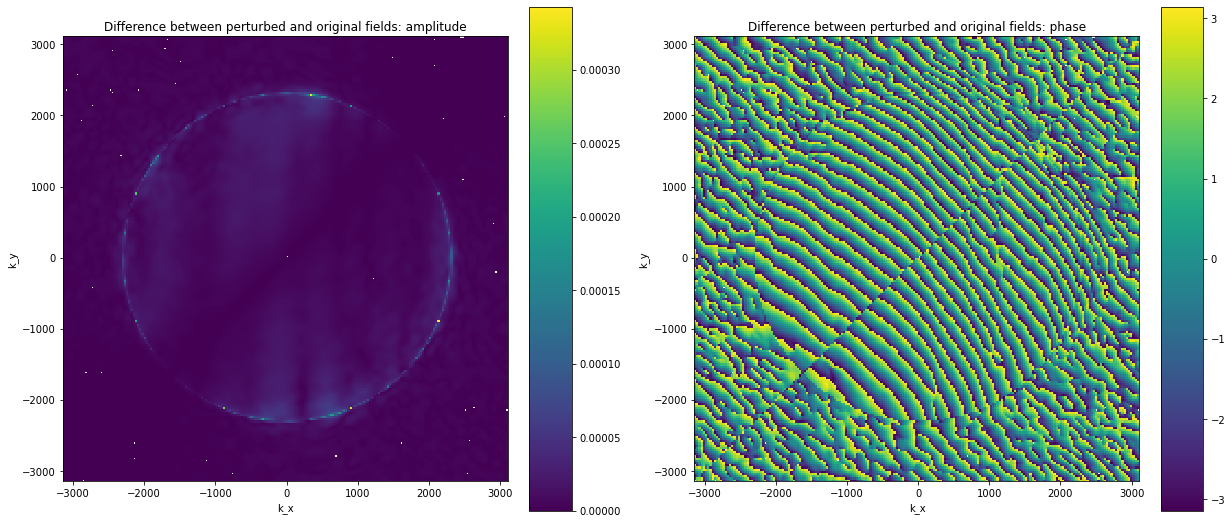

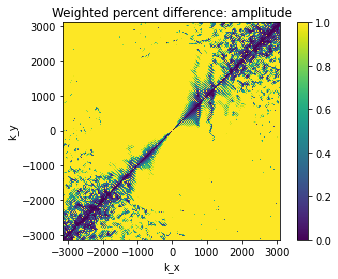

In [15]:
f_Z_errors = electric_field_errors(f_Z_MATLAB,FourierSpace_transformed[2],k_X_Rectangular,k_Y_Rectangular,'k_x','k_y',outputs=1)

In [17]:
help(electric_field_errors)

Help on function electric_field_errors in module electric_field_errors:

electric_field_errors(original_field, perturbed_field, x, y, label_1, label_2, outputs=0)
    Returns a bunch of metrics in a Python dictionary called error_metrics that quantify the
    error between original_field and perturbed_field. Can also produce output plots if outputs argument
    is set to 1. Meant to be used in conjunction with NF2FF.
    Takes in as inputs two electric fields, and the labels for axes on plots
    x and y are values along the two axes (theta and phi for a far-field pattern)
    set outputs to 1 if want text and plot outputs. 0 (default) supresses outputs



In [19]:
f_Z_error_real = f_Z_errors['error'].real
f_Z_error_imag = f_Z_errors['error'].imag

In [20]:
print(f_Z_error_real)
print(f_Z_error_imag)

[[-1.61796528e-21 -1.09853303e-09 -8.46203436e-09 ...  9.92903058e-07
   2.45980356e-06  1.85552312e-06]
 [-7.65700235e-10 -2.11758237e-22 -4.22610048e-09 ...  1.24456046e-06
   1.61145271e-06  4.89642690e-07]
 [-9.18844883e-09 -1.79624601e-09  1.90582413e-21 ...  1.76837030e-06
   1.40364159e-06  6.91787684e-07]
 ...
 [-2.66321757e-06 -5.23116184e-06 -4.03353151e-06 ...  6.35274710e-22
  -1.07095379e-08 -6.18013388e-09]
 [-4.37549379e-06 -3.71384024e-06 -6.50505661e-07 ...  9.65266373e-09
   1.16467030e-21  1.27678877e-08]
 [-2.71531930e-06 -8.08182656e-07  1.13826623e-06 ...  1.34072462e-09
  -1.10633288e-08  2.96461532e-21]]
[[ 4.23516474e-22  7.17320241e-09  1.42237395e-08 ... -2.77681214e-06
  -8.43532549e-07  1.11088796e-06]
 [-1.72738319e-09  9.39677176e-22  8.79704311e-09 ... -2.18827266e-06
  -1.13649635e-07  6.69489965e-07]
 [-2.73084745e-09 -7.88870155e-09  2.11758237e-22 ... -1.95370804e-06
  -2.27045534e-07 -1.12092970e-08]
 ...
 [ 4.33551033e-06  1.24298427e-06 -2.7684960

In [29]:
print('Mean error in real component of f_Z: {:e}'.format(np.nanmean(np.abs(f_Z_error_real))))
print('Min error in real component of f_Z: {:e}'.format(np.nanmin(np.abs(f_Z_error_real))))
print('Max error in real component of f_Z: {:e}'.format(np.nanmax(np.abs(f_Z_error_real))))
print('Median error in real component of f_Z: {:e}'.format(np.nanmedian(np.abs(f_Z_error_real))))
print('Mean error in imaginary component of f_Z: {:e}'.format(np.nanmean(np.abs(f_Z_error_imag))))
print('Min error in imaginary component of f_Z: {:e}'.format(np.nanmin(np.abs(f_Z_error_imag))))
print('Max error in imaginary component of f_Z: {:e}'.format(np.nanmax(np.abs(f_Z_error_imag))))
print('Median error in imaginary component of f_Z: {:e}'.format(np.nanmedian(np.abs(f_Z_error_imag))))

Mean error in real component of f_Z: 4.397381e-06
Min error in real component of f_Z: 0.000000e+00
Max error in real component of f_Z: 3.071459e-04
Median error in real component of f_Z: 1.862173e-06
Mean error in imaginary component of f_Z: 4.416787e-06
Min error in imaginary component of f_Z: 0.000000e+00
Max error in imaginary component of f_Z: 3.177186e-04
Median error in imaginary component of f_Z: 1.868228e-06


In [30]:
help(FouriertoFF)

Help on function FouriertoFF in module NF2FF:

FouriertoFF(f_x, f_y, f_z, theta, phi, k_x, k_y, k0, FFOutputs=False)
    Brings data from plave wave spectrum to the far-field pattern, by first inteprolating the data into
    spherical, then applying transformation.
    Returns list with [Etheta,Ephi]
    Input parameters:
    f_x, f_y, f_z: plane wave spectrum in x, y, z polarizations
    theta: vector of theta values for spherical coordinates
    phi: vector of phi values for spherical coordinates
    k_x and k_y: spectral frequency vector components
    k0: wave number (2pi/lambda0)
    plotFourier: if True, plots final FF pattern



In [31]:
FouriertoFF(FourierSpace_transformed[0],FourierSpace_transformed[1],FourierSpace_transformed[2],theta,phi,k_X_Rectangular,k_Y_Rectangular,k0,FFOutputs=False)

NameError: name 'f_x_Spherical' is not defined